<a href="https://colab.research.google.com/github/Aniebiet1/ML_models/blob/main/califonia_housepricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Dataset

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
  os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)


In [4]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


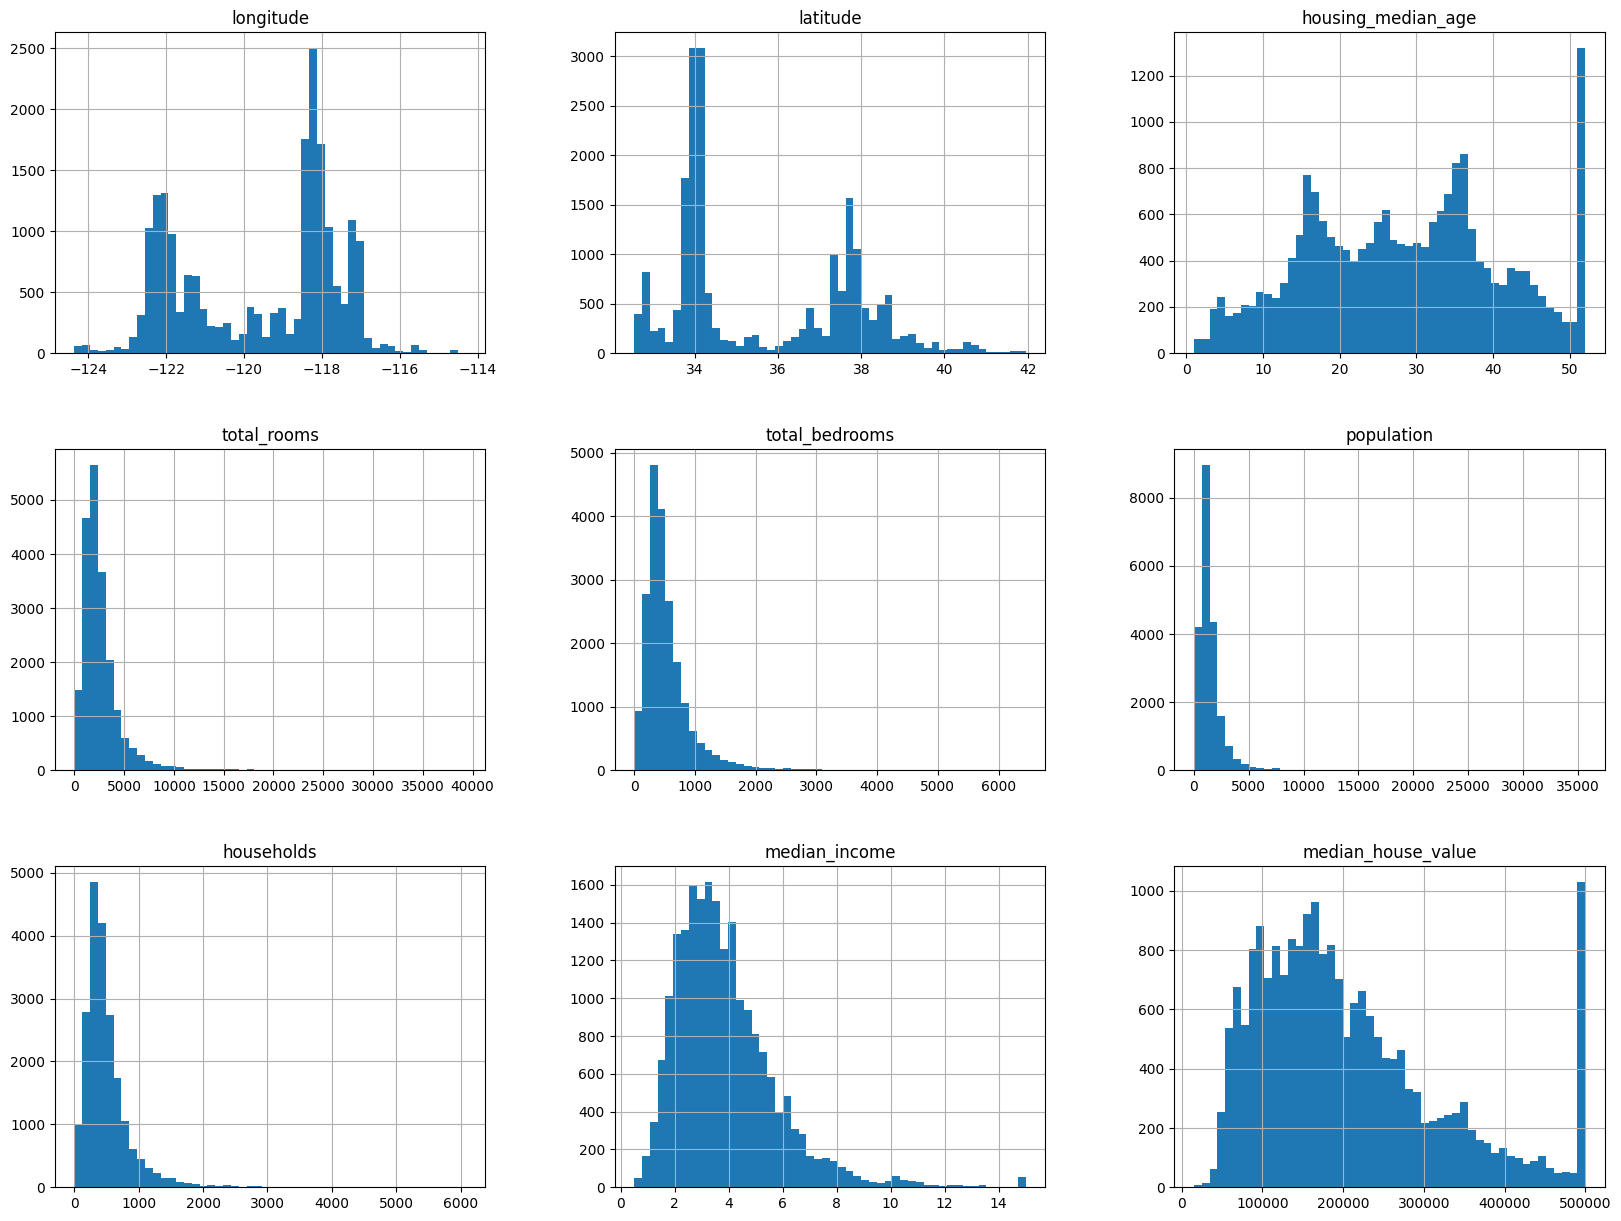

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Spliting dataset into train and test set

In [9]:
import numpy as np

from sklearn.model_selection import train_test_split
train_test_split(housing, test_size=0.25, random_state=50)

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 20614    -121.54     39.08                26.0       2276.0           460.0   
 13870    -117.32     34.41                13.0       2032.0           348.0   
 498      -122.27     37.85                47.0       2077.0           400.0   
 8006     -118.10     33.85                36.0        956.0           159.0   
 8797     -118.46     33.77                28.0       3065.0           406.0   
 ...          ...       ...                 ...          ...             ...   
 14565    -117.20     32.84                32.0       2033.0           394.0   
 15649    -122.41     37.79                52.0       2161.0           544.0   
 10123    -117.92     33.93                12.0       4415.0           890.0   
 5600     -118.27     33.79                39.0       1513.0           365.0   
 14000    -117.24     34.59                 4.0       5027.0           797.0   
 
        population  households  median

# Stratified sampling on income_cate"Category"

In [10]:
# creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil
# (to have discrete categories), and then merging all the categories greater than 5 into category 5:

housing["income_cate"] = np.ceil(housing["median_income"]/1.5)
housing["income_cate"].where(housing["income_cate"] < 5,  5.0, inplace=True)

<ipython-input-10-8b5c532a3779>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cate"].where(housing["income_cate"] < 5,  5.0, inplace=True)


In [11]:
housing["income_cate"].value_counts()

,count
income_cate,
3.0,7236
2.0,6581
4.0,3639
5.0,2362
1.0,822


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(housing, housing["income_cate"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [13]:
housing["income_cate"].value_counts() / len(housing)

,count
income_cate,
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


In [16]:
# Removing the Income_cate from the original dataset
for set_ in (strat_test_set, strat_train_set):
  set_.drop(["income_cate"], axis= 1, inplace= True )

In [17]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,212800.0,<1H OCEAN
10111,-117.94,33.94,25.0,3250.0,546.0,1452.0,501.0,5.1084,303800.0,<1H OCEAN
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND
16700,-120.61,35.10,17.0,2799.0,637.0,2015.0,592.0,3.0536,143600.0,<1H OCEAN
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,78300.0,INLAND


In [18]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

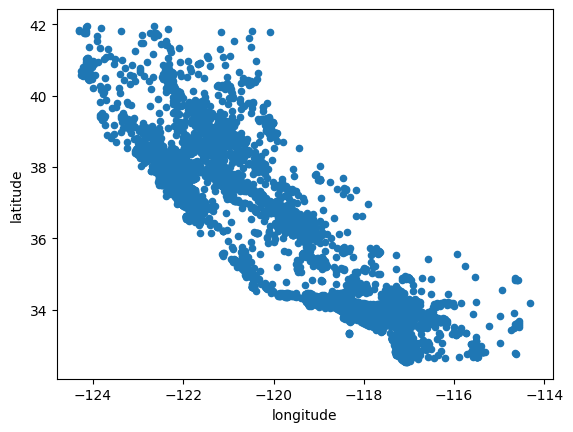

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

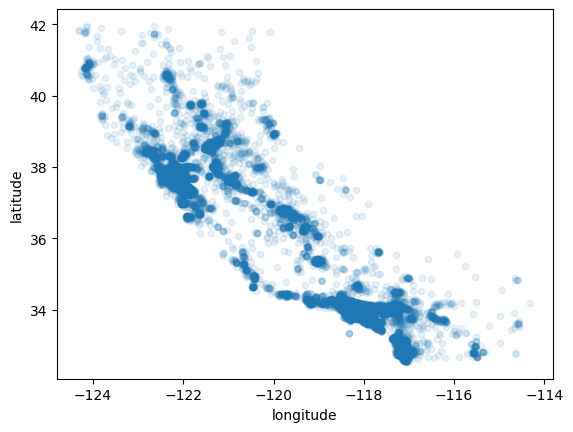

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)